### K Nearest Neighbours

Given a dataset of company. They have hidden the column names and only given data and target classes. We'll try to use the KNN to create a model that directly predicts a class for a new data point based on the feature

In [167]:
## Import the libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

##### Load the Data

Set index_col=0 to use the first column as the index.

In [170]:
df=pd.read_csv('Classified Data.txt',index_col=0)

In [172]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [174]:
## Divide the data into dependent and independent features 
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [176]:
## Scale the data 
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scale_data=scalar.fit_transform(x)

In [178]:
x=pd.DataFrame(scale_data,columns=x.columns)
x.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

In [182]:
df=pd.concat([x,y],axis=1)

In [184]:
import seaborn as sns 
sns.pairplot(df,hue='TARGET CLASS')

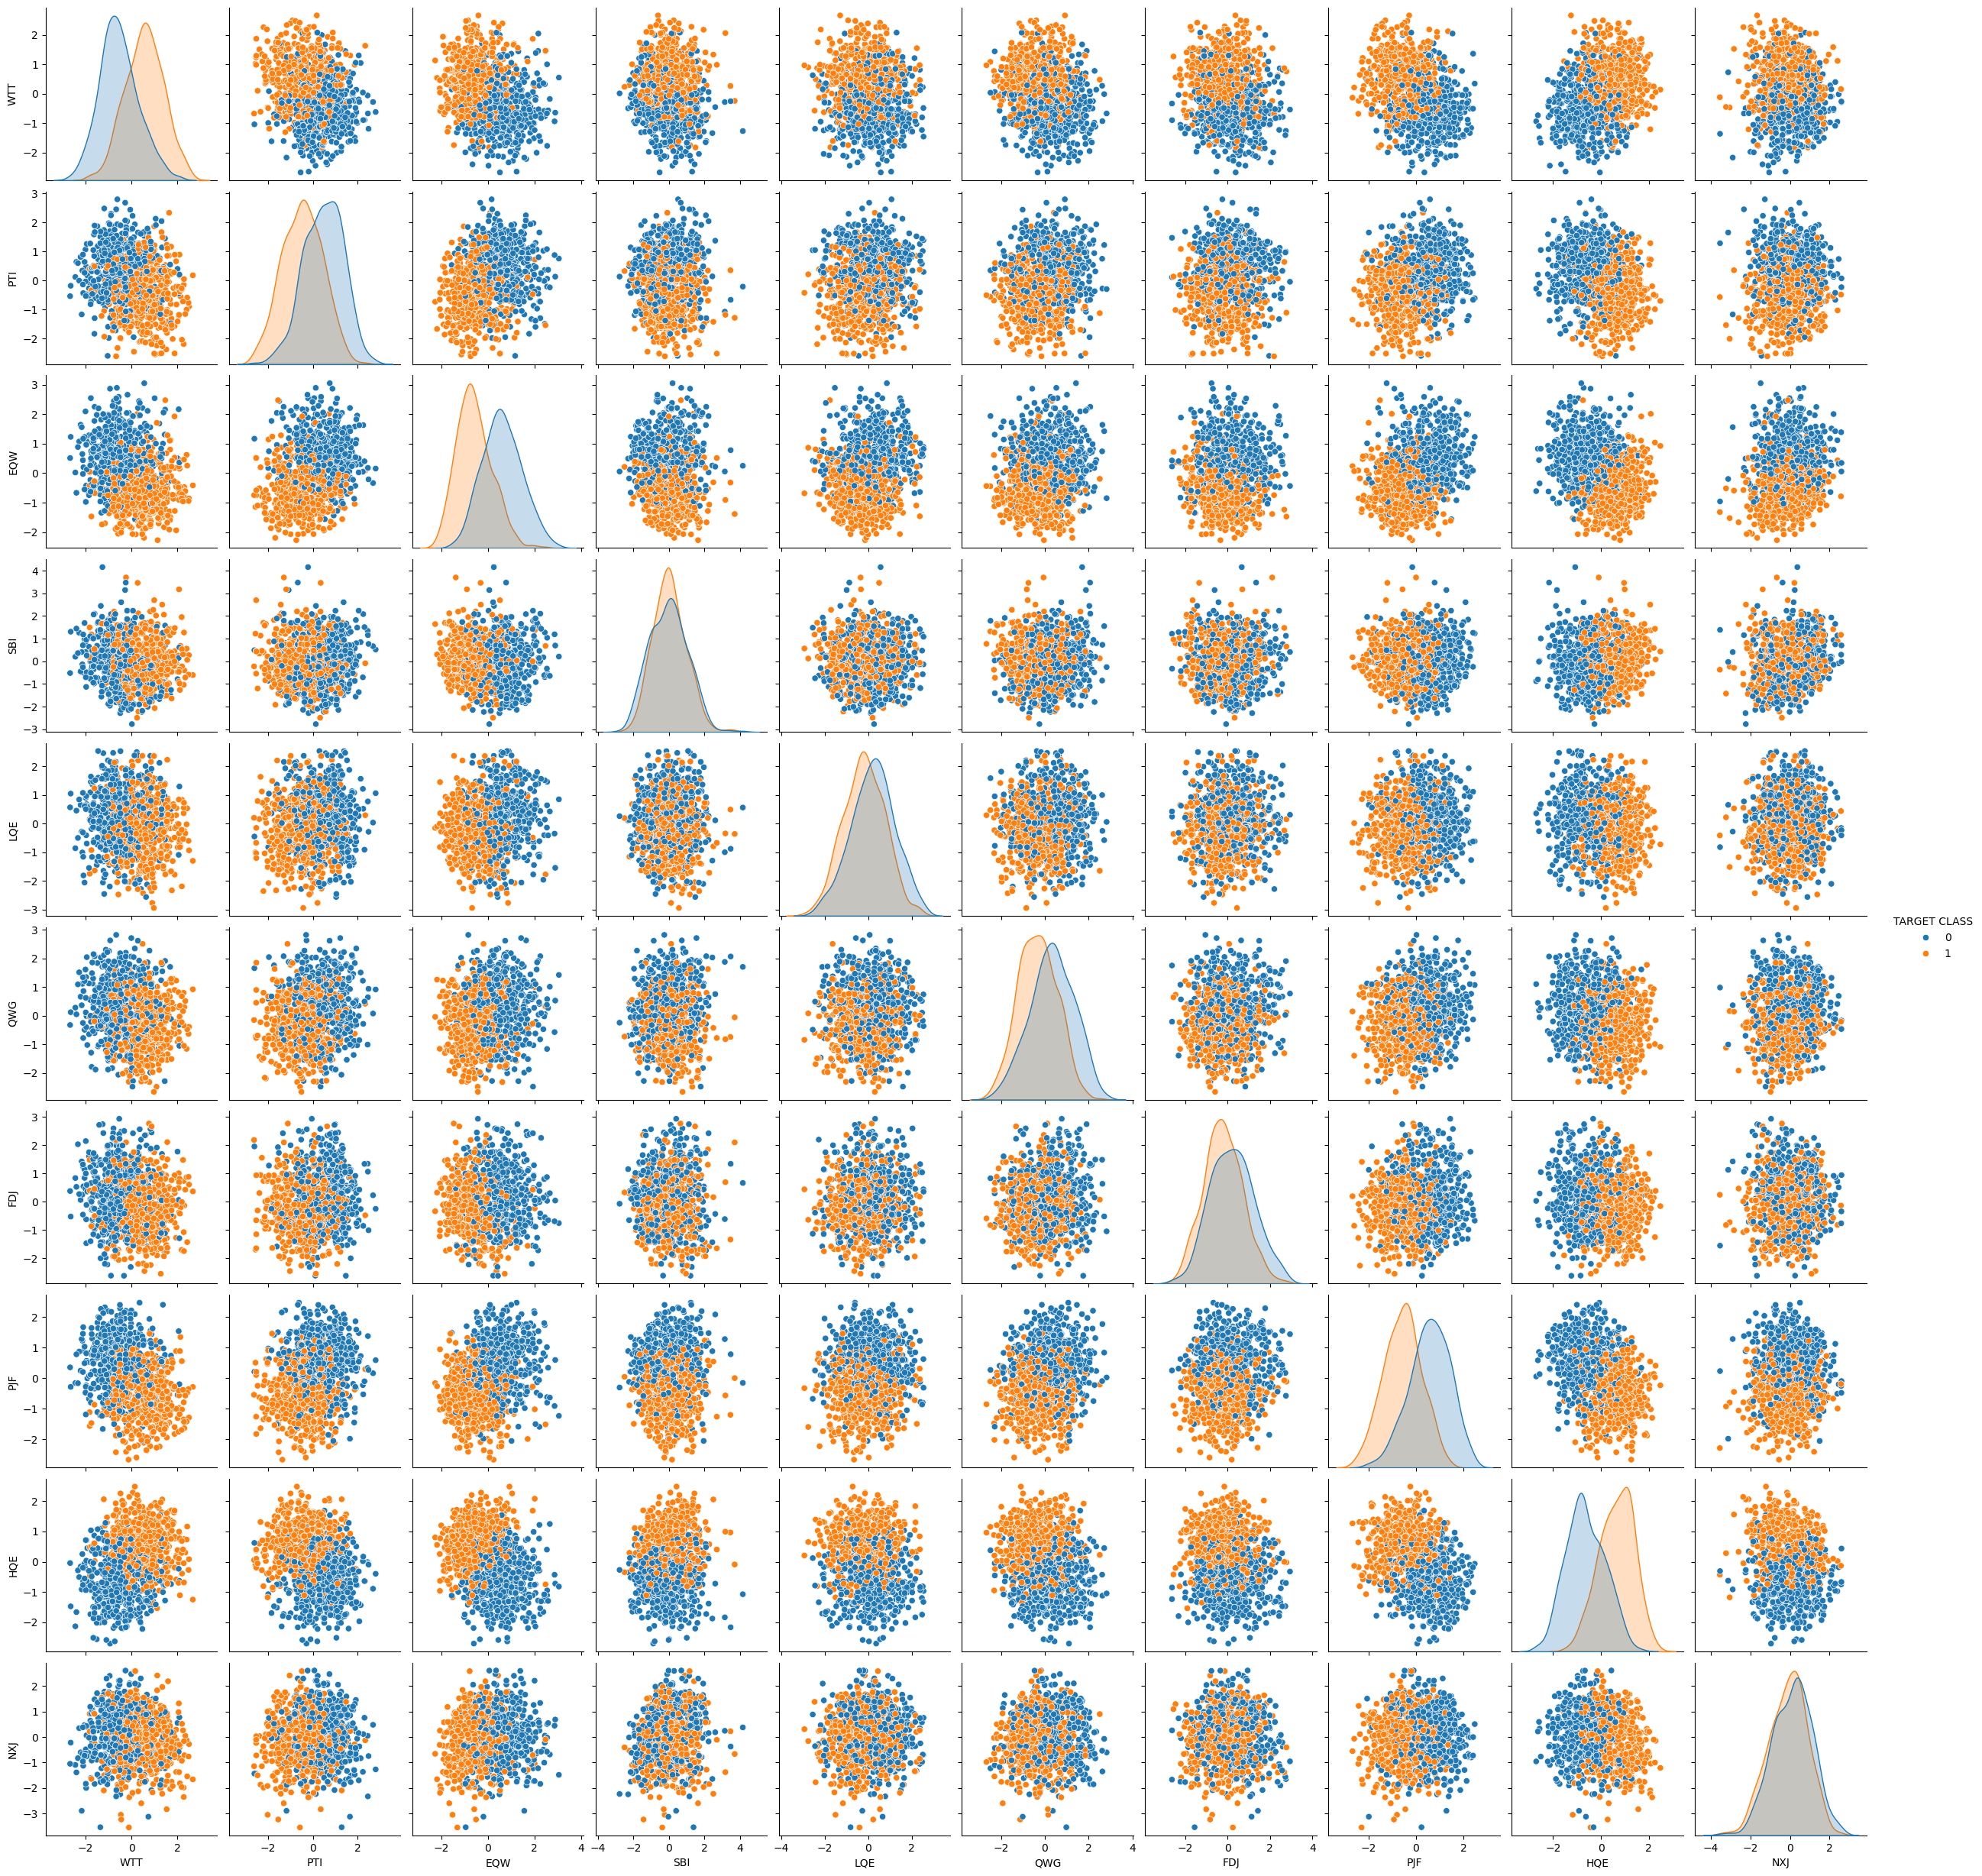

In [186]:
plt.show()

In [100]:
## We will divide our data into train test and split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

##### Use KNN model

In [105]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=1)

In [109]:
## train our data 
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [111]:
y_pred = classifier.predict(x_test)

##### Predictions and Evaluations 

In [114]:
from sklearn.metrics import confusion_matrix,classification_report

In [116]:
print(confusion_matrix(y_test,y_pred))

[[132  13]
 [ 13 142]]


In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       145
           1       0.92      0.92      0.92       155

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



##### Choosing a right K value using Elbow method

In [141]:
error_rate = []

for i in range(1,40):
    classifier_i = KNeighborsClassifier(n_neighbors=i)
    classifier_i.fit(x_train,y_train)
    y_pred =classifier_i.predict(x_test)
    error_rate.append(np.mean( y_pred != y_test))

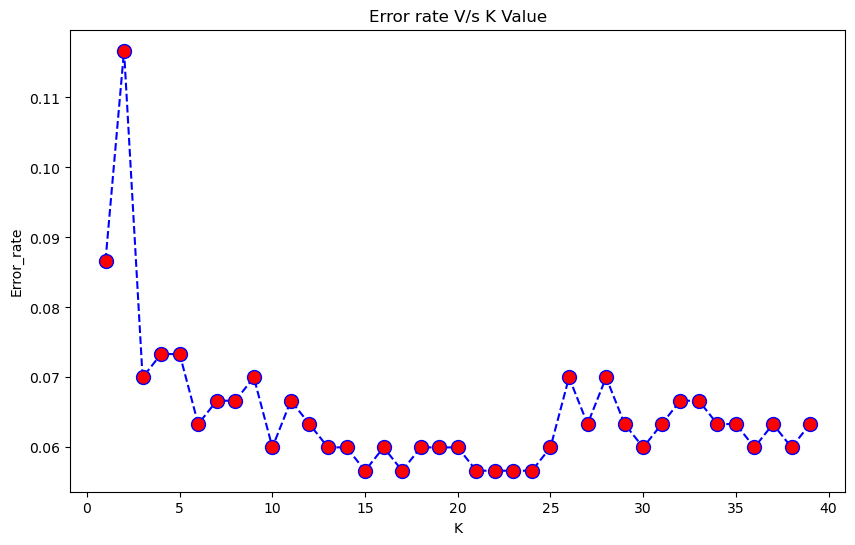

In [143]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate V/s K Value')
plt.xlabel('K')
plt.ylabel('Error_rate')
plt.show()

In the above figure, for K=15, the error value is less, I will select K=15

In [146]:
classifier=KNeighborsClassifier(n_neighbors=15)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [148]:
print(confusion_matrix(y_test,y_pred))

[[136   9]
 [  8 147]]


In [150]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       145
           1       0.94      0.95      0.95       155

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Here we can see , Overall my False +ve and False -ve values decreased and precision and recall increased to 94% and 95% respectively.